**K-Nearest-Neighbors**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

In [16]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [17]:
X = df.drop('target', axis=1)
y = df['target']


In [18]:
print("Dataset Shape:", X.shape)
print(X.head())


Dataset Shape: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1)  KNN uses distance. If one feature is "Income" (100,000) and another is "Age" (50),


2)  Income will dominate the distance calculation. Scaling fixes this.

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1)  The "Lazy" Learner KNN is what we call a Lazy Learner.Linear/Logistic Regression are "Eager Learners." When you run .fit(), they sweat to calculate the perfect slopes ($m$) and intercepts ($b$). They "compile" the data into a mathematical equation and then throw the data away.

2)  KNN does the opposite. When you run .fit(), it simply memorizes the data. It takes your $X_{train}$ and $y_{train}$ and stores them in memory.

In [30]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

1)  While there is no mathematical optimization (like Gradient Descent), there is a computer science optimization happening in the background of .fit().

2)  If you have 100,000 points, calculating the distance to every single one later would be too slow. So, sklearn organizes the data into a smart tree structure, usually a K-D Tree or Ball Tree.

3)  Think of this like organizing a library. Instead of throwing books in a pile, .fit() organizes them by genre, then author, then title.

4)  This makes finding the "nearest neighbors" much faster later on.

In [22]:
y_pred = knn_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 100.00%


1)  Since .fit() was lazy, the .predict() function has to do all the heavy lifting. When you ask it to predict a flower species:Distance Calculation: It calculates the Euclidean Distance between your new flower ($x_{new}$) and the stored training points ($x_i$).$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

2)  It's just the Pythagorean theorem ($a^2 + b^2 = c^2$) extended to 4 dimensions (since we have 4 features).Sorting: It finds the K points with the smallest distance $d$.Voting: It counts the classes of those K neighbors and returns the winner.

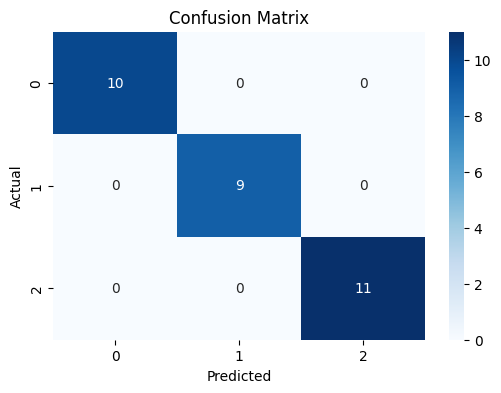

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1)  Low K (e.g., K=1): The model is too complex. It memorizes noise. This is Overfitting (High Variance).

2)  High K (e.g., K=50): The model is too simple. It ignores details and just votes for the majority class. This is Underfitting (High Bias).

3)  The "Valley" (Optimal K): The point in the middle where you perfectly balance bias and variance.

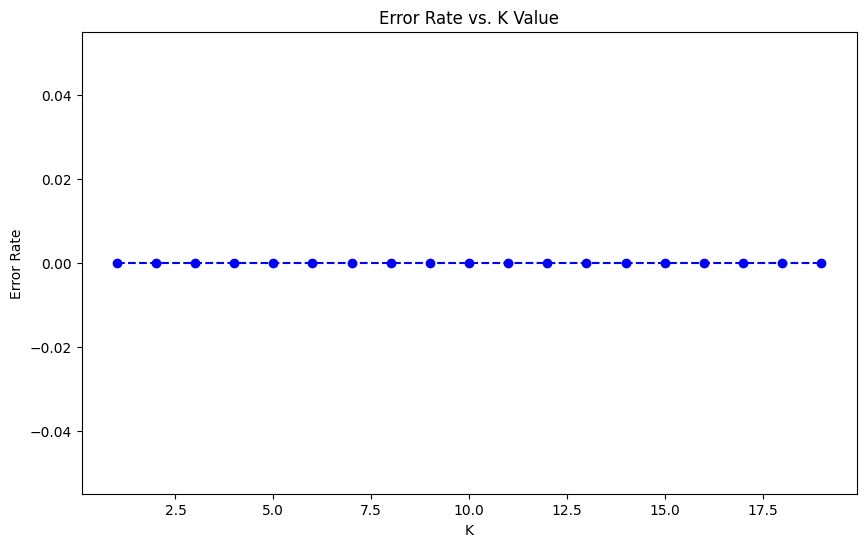

In [33]:
# Finding the optimal K
# Hyperparameter Tuning
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # Average of where prediction was NOT equal to actual
    error_rate.append(np.mean(pred_i != y_test))

# Plotting
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

1)  The iris dataset is well classified dataset so for any value of K here doesn't affect the accuracy.

2)  But for any another classification dataset for KNN you must choose the optimal K value for which error rate is minimum.

3)  On paper this value of K can be obtained by K-fold cross validation technique using random search.